#### NAME: RICHARD WAMBEDE ,   ACCESS NUMBER: B31328  ###

## Theme 1:  Question . 1 Using the dataset (diabetes_012_health_indicators_BRFSS2015.csv)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nltk
import re

import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize #for tokenizing

## Theme 1:  Question . 2 Data Preprocessing

In [4]:
# Load Emotions Data 
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (253680, 22)


In [6]:
#Check for missing data
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
#Check for duplicates
df.duplicated().sum()

np.int64(23899)

## Theme 1: Question . 3 (a.) Explorering disease trends 

Column Names in the Dataset:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Possible Time Columns: []

No time-related column found. Using Age as a proxy for trends.


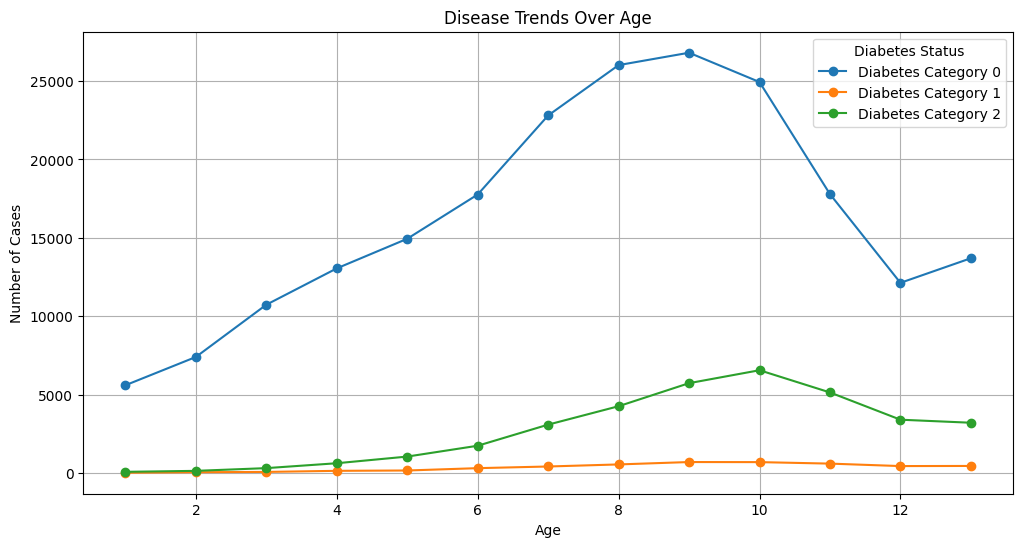

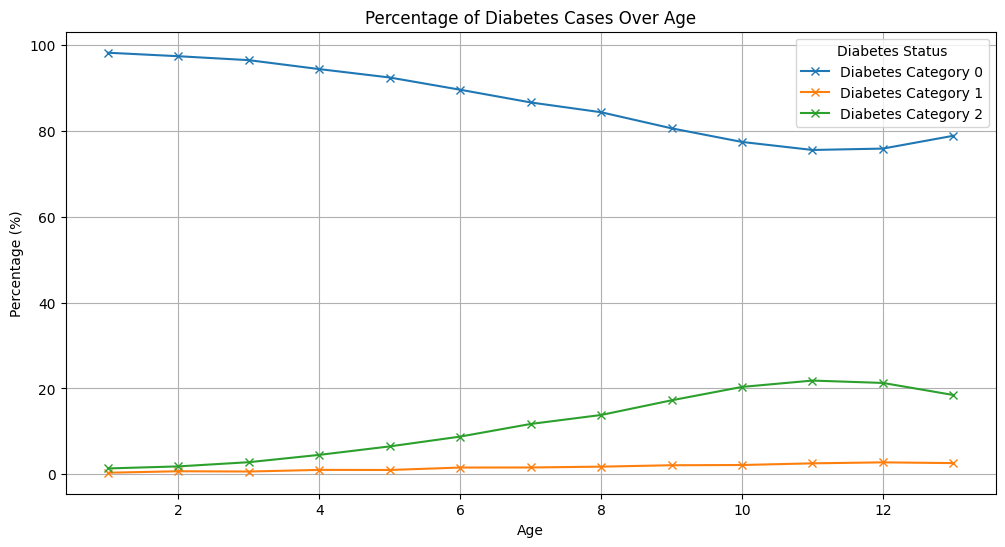


Disease Trends Over Time (Raw Counts):
Diabetes_012      0    1     2
Age                           
1              5601   21    78
2              7404   54   140
3             10737   72   314
4             13055  142   626
5             14943  163  1051
6             17765  312  1742
7             22808  418  3088
8             26019  550  4263
9             26809  702  5733
10            24939  697  6558
11            17790  602  5141
12            12132  445  3403
13            13701  453  3209

Percentage of Diabetes Cases Over Time:
Diabetes_012          0         1          2
Age                                         
1             98.263158  0.368421   1.368421
2             97.446696  0.710713   1.842590
3             96.529713  0.647307   2.822979
4             94.444043  1.027273   4.528684
5             92.486229  1.008851   6.504920
6             89.636208  1.574247   8.789545
7             86.676294  1.588508  11.735198
8             84.389595  1.783861  13.826544
9   

In [9]:
# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display column names to identify time-related variables
print("Column Names in the Dataset:")
print(df.columns)

# Check if there's a time or date column
time_columns = [col for col in df.columns if 'year' in col.lower() or 'date' in col.lower()]
print("\nPossible Time Columns:", time_columns)

# If no time column, use Age as a proxy for trends
if not time_columns:
    print("\nNo time-related column found. Using Age as a proxy for trends.")
    time_var = 'Age'
else:
    time_var = time_columns[0]  # use the first time column found

# Group data by time variable and diabetes status
trend_data = df.groupby([time_var, 'Diabetes_012']).size().unstack().fillna(0)

# Plot disease trends over time (or age)
plt.figure(figsize=(12, 6))
for col in trend_data.columns:
    plt.plot(trend_data.index, trend_data[col], marker='o', label=f'Diabetes Category {col}')

plt.title(f'Disease Trends Over {time_var}')
plt.xlabel(time_var)
plt.ylabel('Number of Cases')
plt.legend(title='Diabetes Status')
plt.grid(True)
plt.show()

# Percentage of diabetes cases over time
percent_trend = trend_data.div(trend_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
for col in percent_trend.columns:
    plt.plot(percent_trend.index, percent_trend[col], marker='x', label=f'Diabetes Category {col}')

plt.title(f'Percentage of Diabetes Cases Over {time_var}')
plt.xlabel(time_var)
plt.ylabel('Percentage (%)')
plt.legend(title='Diabetes Status')
plt.grid(True)
plt.show()

# Display trends data for reference
print("\nDisease Trends Over Time (Raw Counts):")
print(trend_data)

print("\nPercentage of Diabetes Cases Over Time:")
print(percent_trend)

## Theme 1: Question . 3 (b.) Identifying the relatioinship between disease and social/ economic/ environmental variables

In [10]:
from scipy.stats import pearsonr, spearmanr


Column Names in the Dataset:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Available Socioeconomic/Environmental Variables: ['Income', 'Education', 'BMI', 'Smoker']


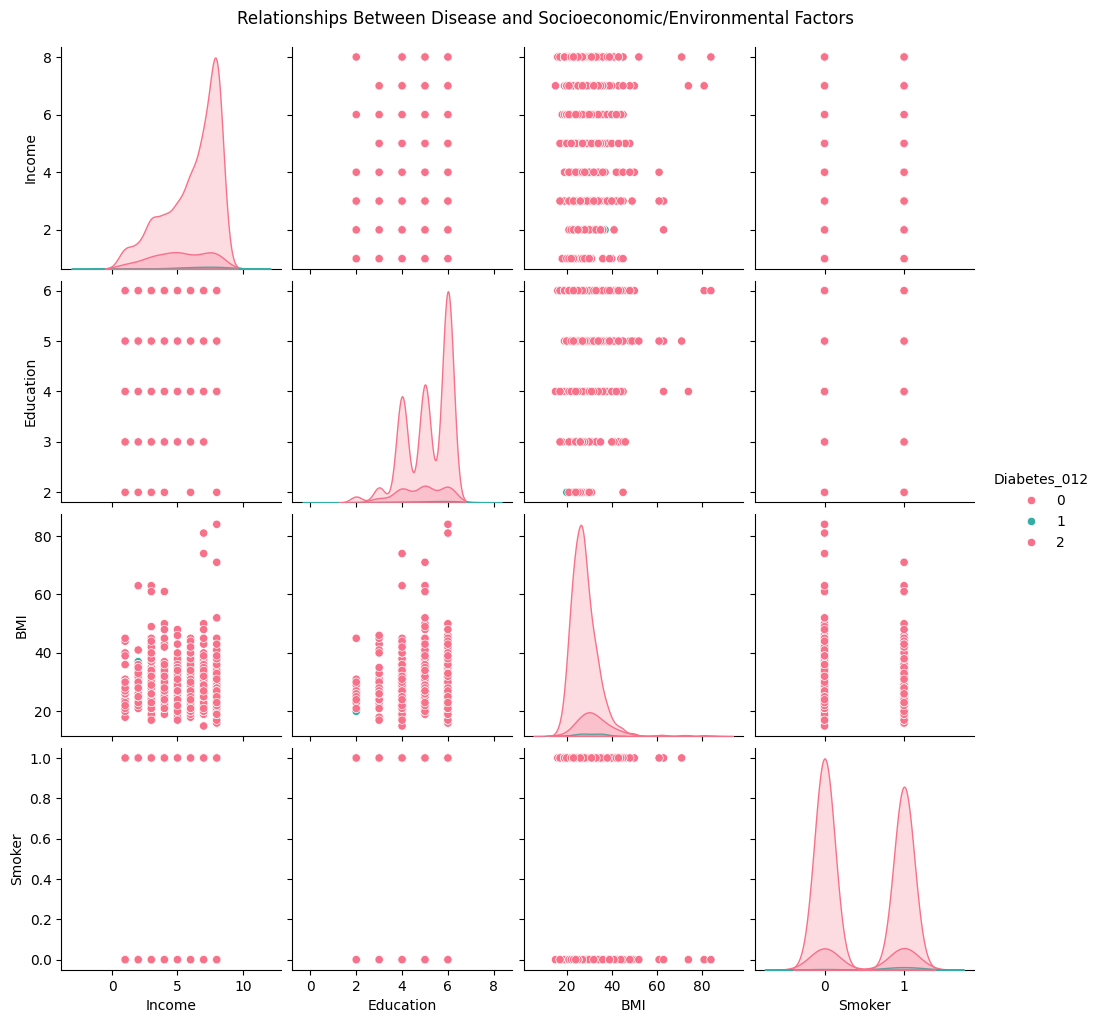


Correlation Between Disease and Socioeconomic/Environmental Variables:
Spearman correlation between Diabetes_012 and Income: -0.17
Spearman correlation between Diabetes_012 and Education: -0.13
Spearman correlation between Diabetes_012 and BMI: 0.24
Spearman correlation between Diabetes_012 and Smoker: 0.06


C:\Users\richard\AppData\Local\Temp\ipykernel_5040\3875524924.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(correlations.keys()), y=list(correlations.values()), palette='coolwarm')


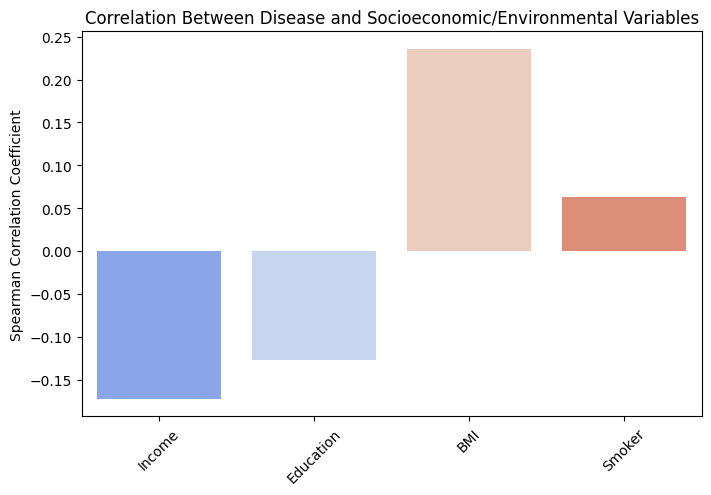

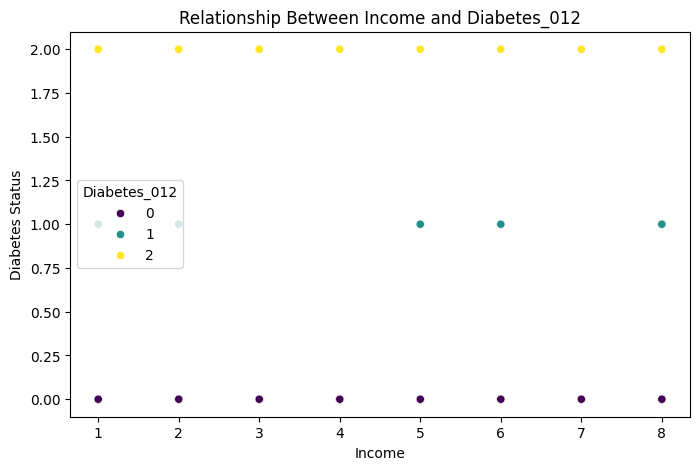

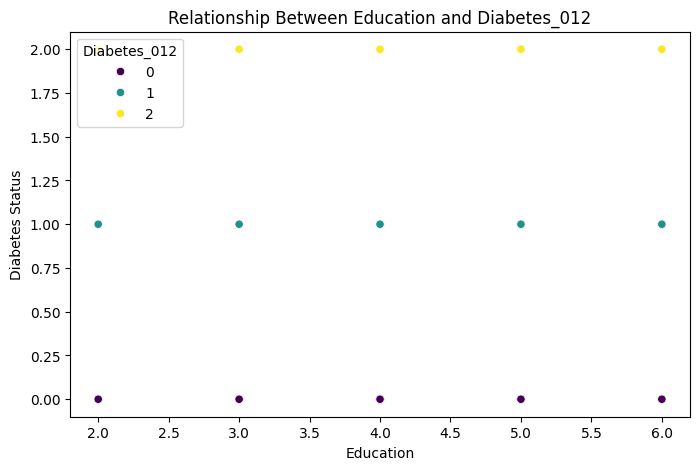

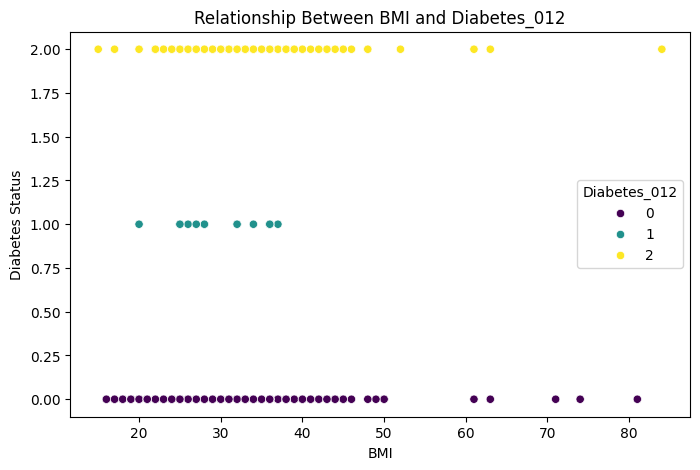

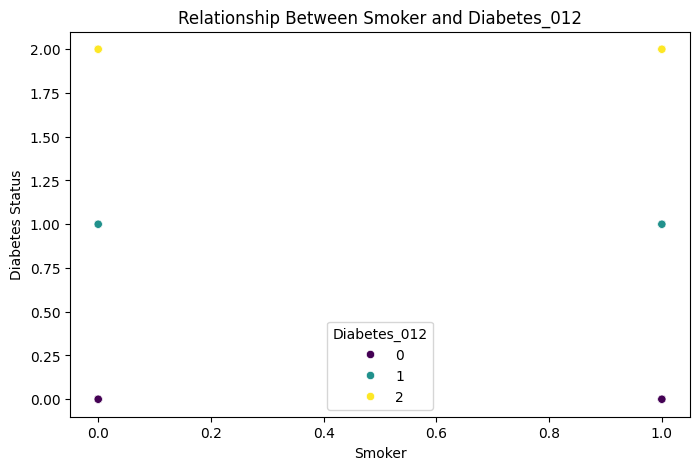


Interpretation:
- Positive correlations: Higher values of socioeconomic variables linked to increased disease risk.
- Negative correlations: Protective factors against disease.
- Neutral correlations: Minimal relationship observed.


In [11]:
# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display column names to identify socioeconomic or environmental variables
print("Column Names in the Dataset:")
print(df.columns)

# Selecting disease and potential socioeconomic/environmental variables
disease_var = 'Diabetes_012'
socio_vars = ['Income', 'Education', 'BMI', 'Smoker', 'AlcoholDrinker', 'PhysicalActivity']

# Check if the selected variables exist in the dataset
available_vars = [var for var in socio_vars if var in df.columns]
print("\nAvailable Socioeconomic/Environmental Variables:", available_vars)

# Pairplot to visualize relationships
sampled_df = df.sample(1000)  # Sampling to reduce overplotting
sns.pairplot(sampled_df, vars=available_vars, hue=disease_var, palette='husl', diag_kind='kde')
plt.suptitle('Relationships Between Disease and Socioeconomic/Environmental Factors', y=1.02)
plt.show()

# Correlation analysis
print("\nCorrelation Between Disease and Socioeconomic/Environmental Variables:")
correlations = {}
for var in available_vars:
    corr, _ = spearmanr(df[disease_var], df[var])
    correlations[var] = corr
    print(f"Spearman correlation between {disease_var} and {var}: {corr:.2f}")

# Visualizing correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()), palette='coolwarm')
plt.title('Correlation Between Disease and Socioeconomic/Environmental Variables')
plt.xticks(rotation=45)
plt.ylabel('Spearman Correlation Coefficient')
plt.show()

# Scatter plots for deeper insights
for var in available_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y=disease_var, data=sampled_df, hue=disease_var, palette='viridis')
    plt.title(f'Relationship Between {var} and {disease_var}')
    plt.xlabel(var)
    plt.ylabel('Diabetes Status')
    plt.show()

# Summary of findings
print("\nInterpretation:")
print("- Positive correlations: Higher values of socioeconomic variables linked to increased disease risk.")
print("- Negative correlations: Protective factors against disease.")
print("- Neutral correlations: Minimal relationship observed.")

## Theme 1: Question . 3 (c.)  I will visually explore the dataset

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth            

C:\Users\richard\AppData\Local\Temp\ipykernel_5040\2292583146.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=df, palette='coolwarm')


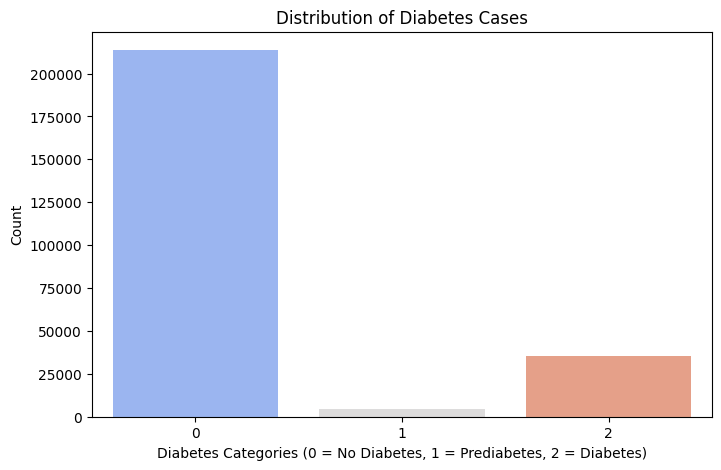

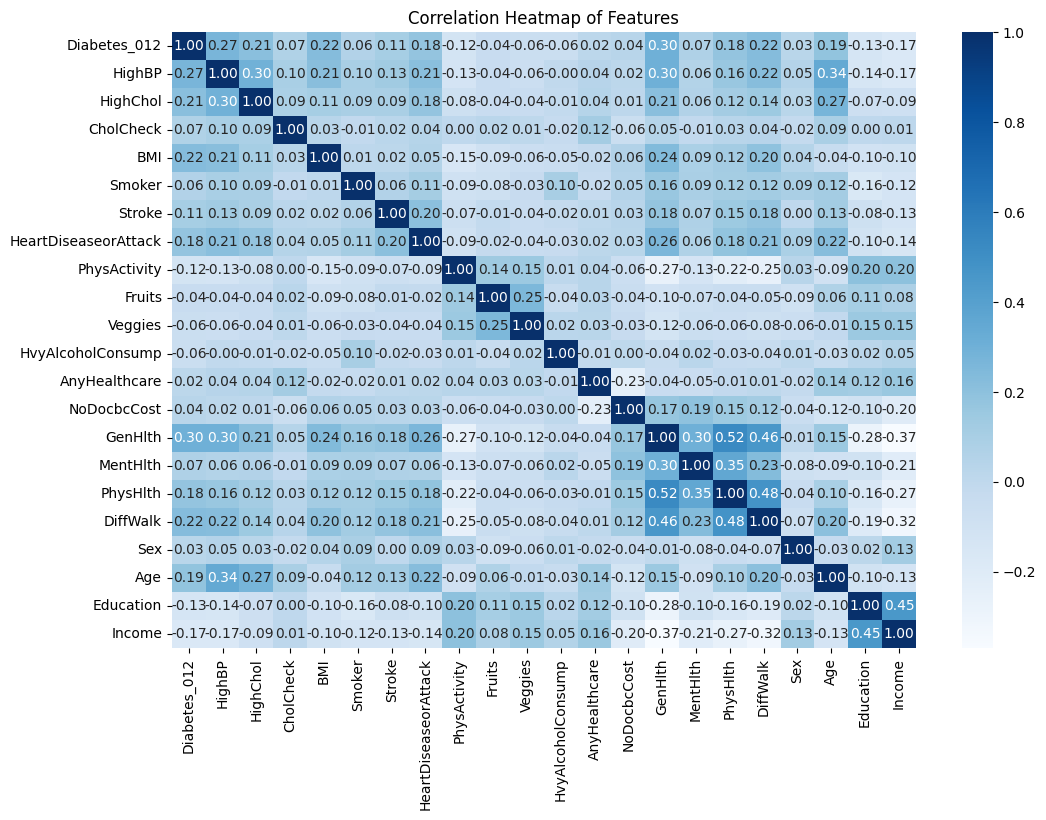

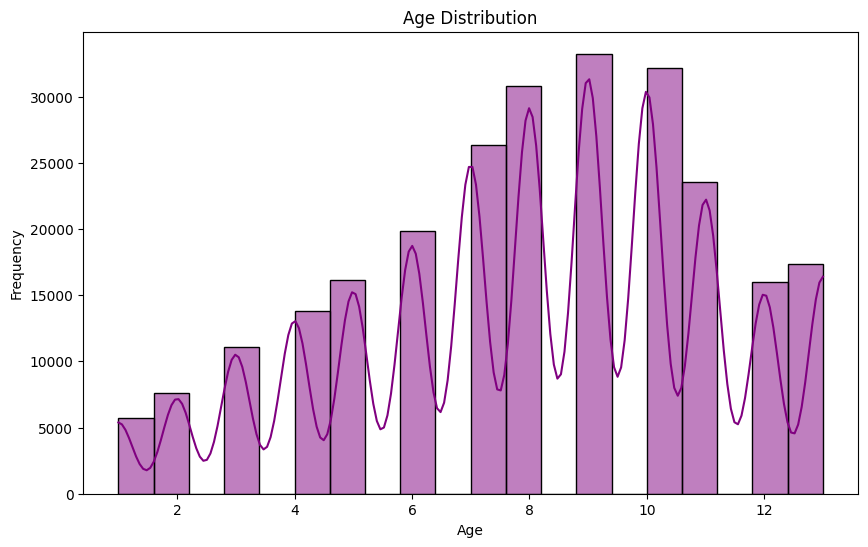

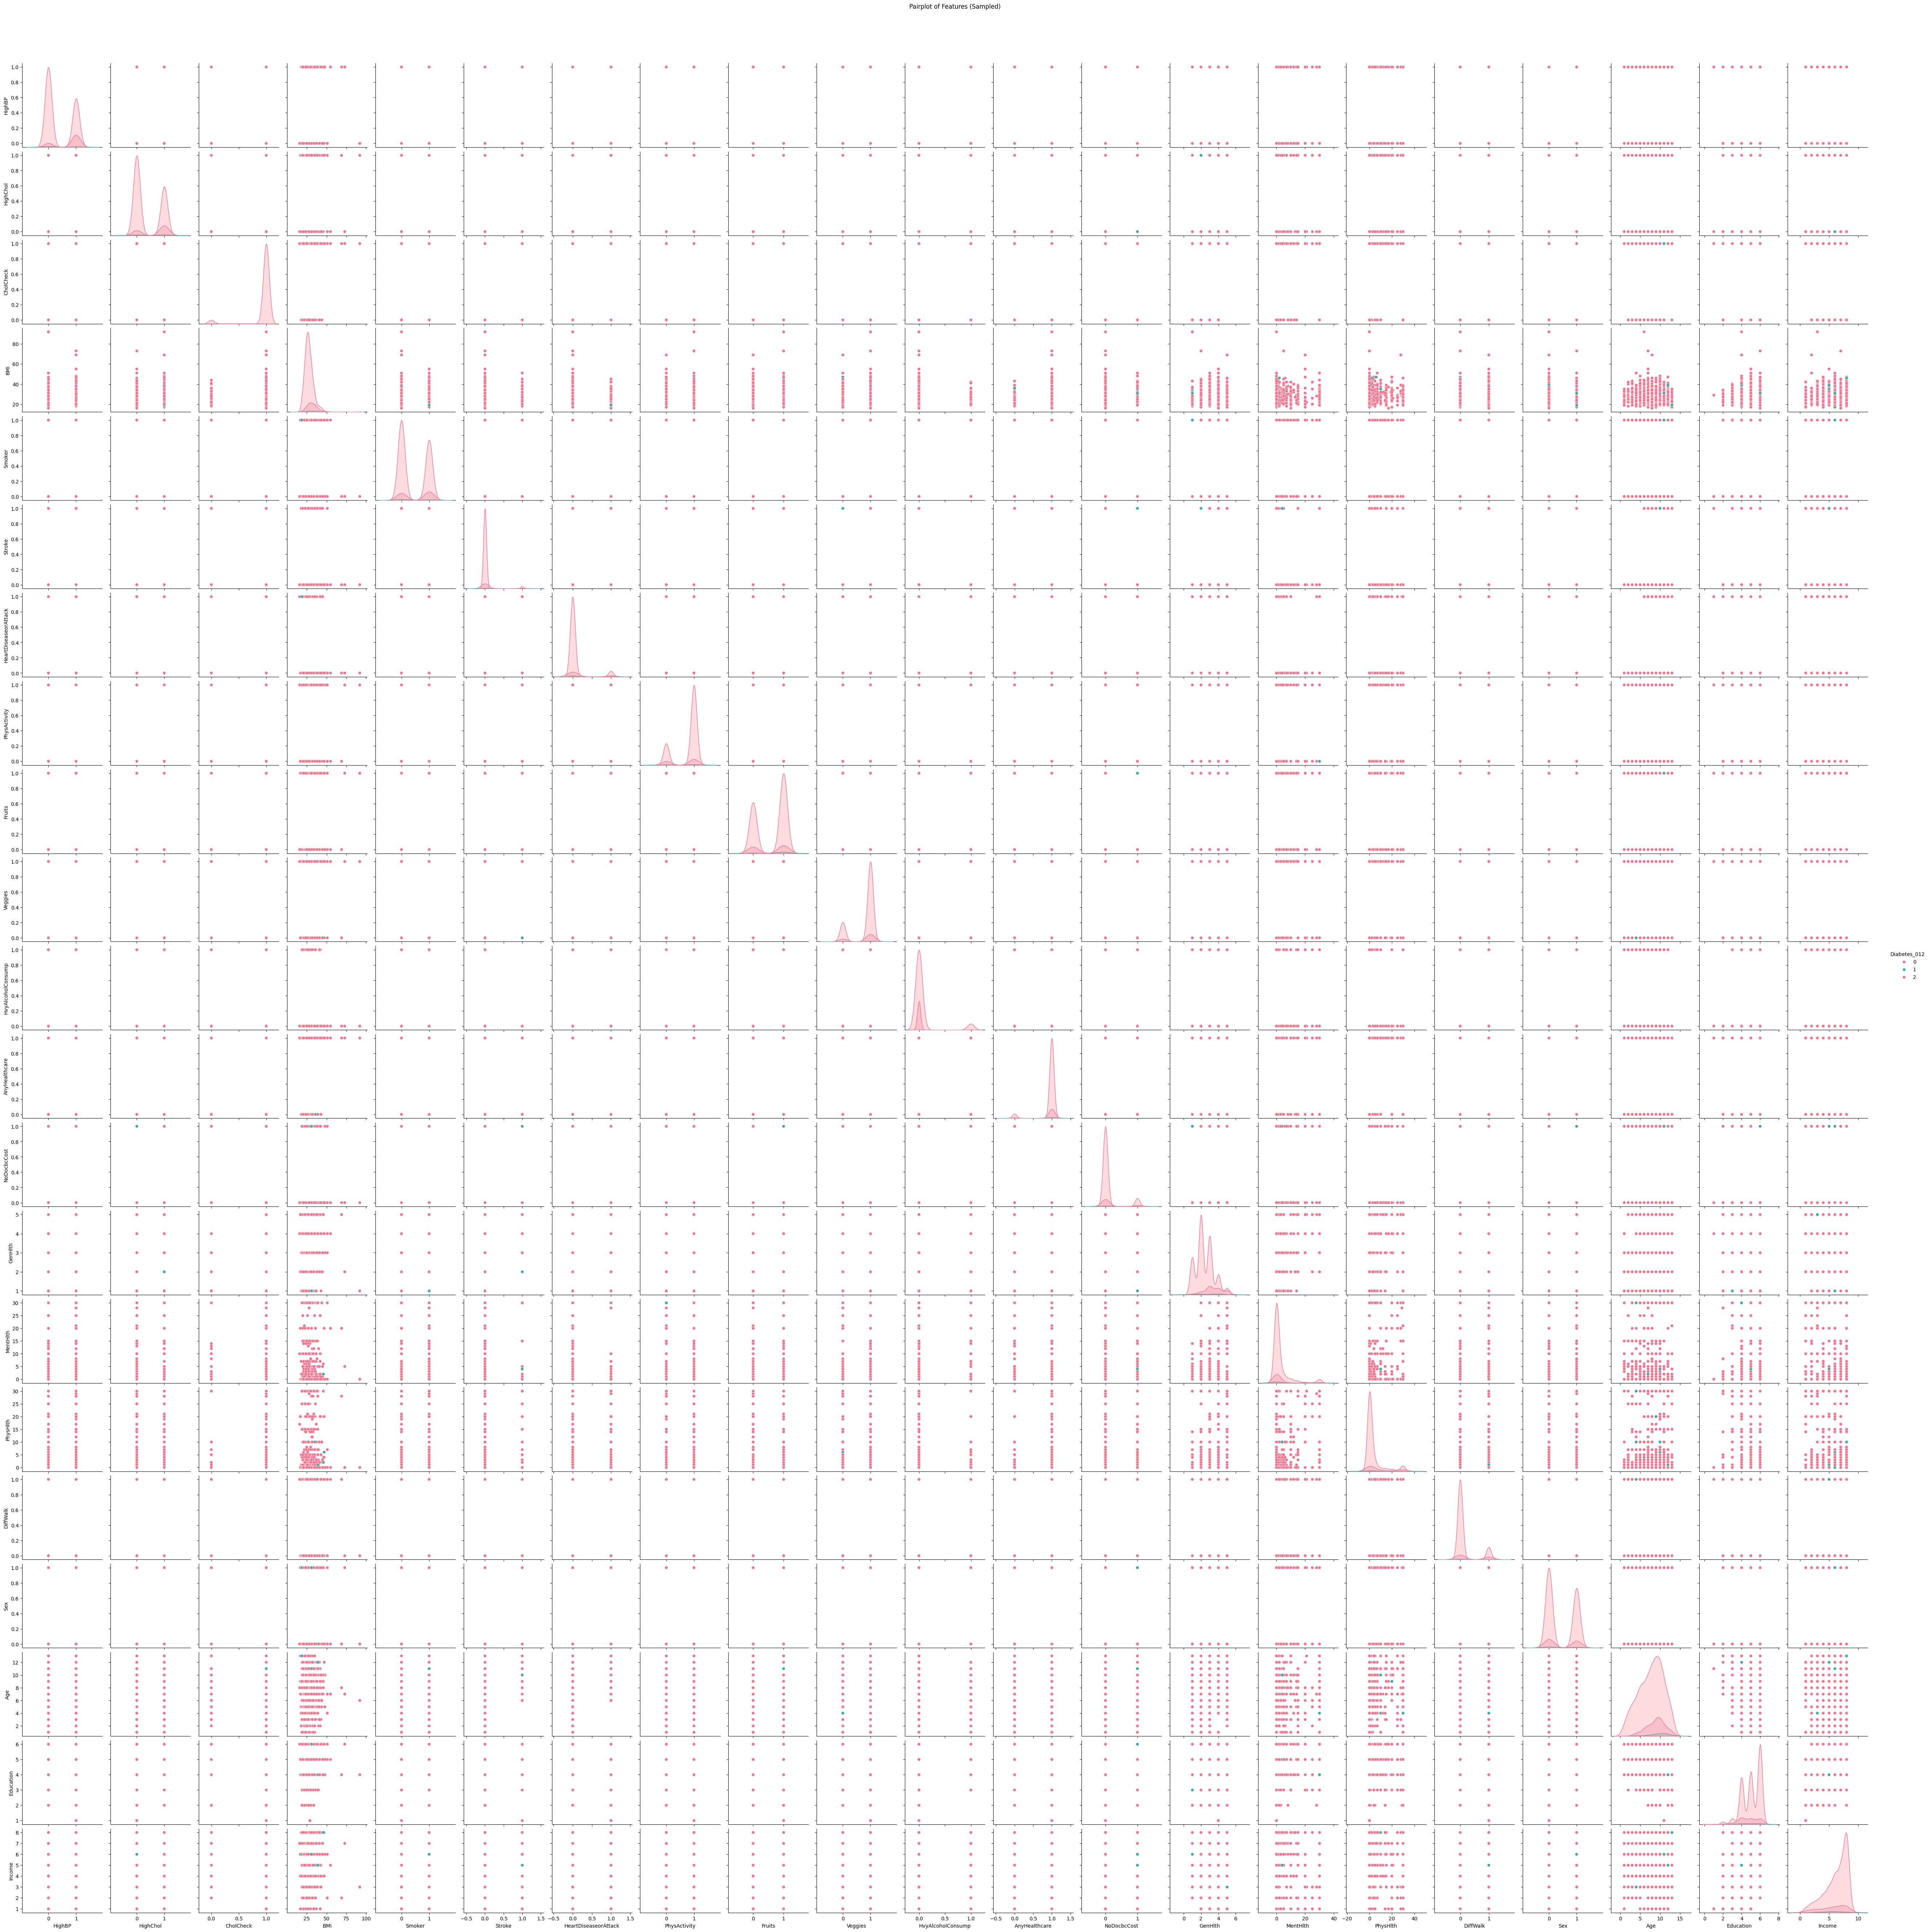

C:\Users\richard\AppData\Local\Temp\ipykernel_5040\2292583146.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='muted')


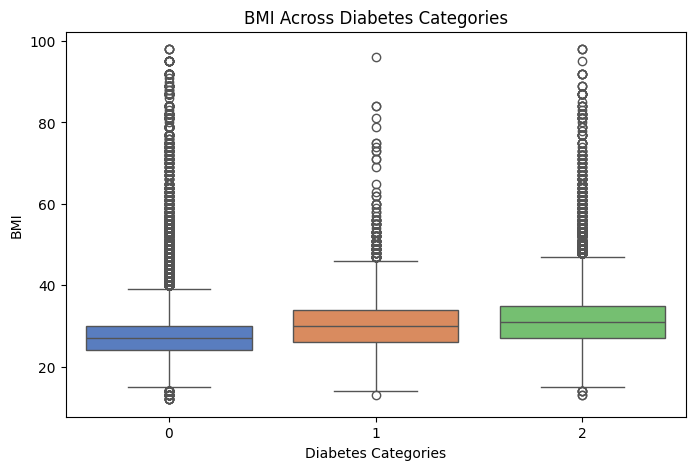

In [8]:
# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Show the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())



# Visualizing the distribution of Diabetes (0, 1, 2)
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_012', data=df, palette='coolwarm')
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes Categories (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Age distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pairplot to check relationships between a few variables
sampled_df = df.sample(1000)  # Sampling to prevent overplotting
sns.pairplot(sampled_df, hue='Diabetes_012', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Features (Sampled)', y=1.02)
plt.show()

# Boxplot for BMI across Diabetes Categories
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='muted')
plt.title('BMI Across Diabetes Categories')
plt.xlabel('Diabetes Categories')
plt.ylabel('BMI')
plt.show()

## Theme 1: Question . 4.  Build , evaluate and optimise predictive model. 
Aim is to predict diabates status using features like the lifestyle, health indicators and social economic 

In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


Column Names in Dataset:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Selected Features for Prediction: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Model Evaluation:
Accuracy: 0.8429517502365185

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     42741
           1       0.00      0.00      0.00       926
           2       0.50      0.20      0.29      7069

    accuracy                           0.84     50736
 

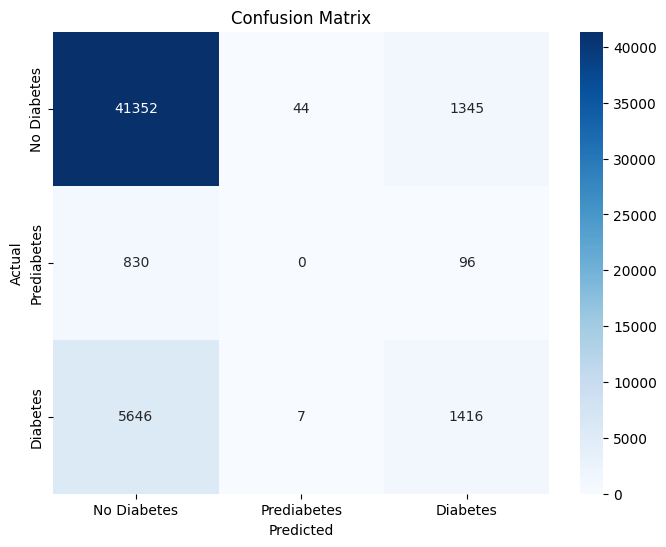

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

Optimized Model Evaluation:
Accuracy: 0.8492194891201513

Classification Report:


c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42741
           1       0.00      0.00      0.00       926
           2       0.57      0.16      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



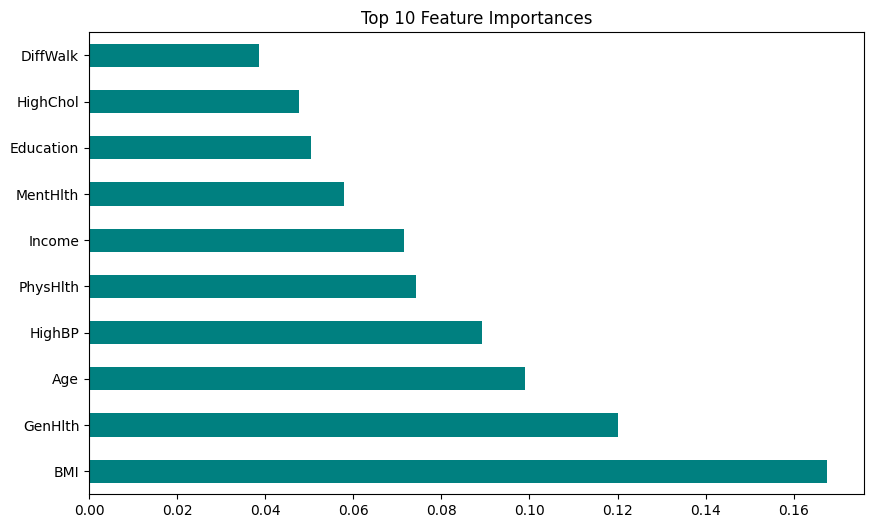

In [14]:
# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display column names to check available features
print("Column Names in Dataset:")
print(df.columns)

# Define target variable
target = 'Diabetes_012'

# Automatically filter features: Exclude target and any non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_cols if col != target]

print("\nSelected Features for Prediction:", features)

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Handle missing values (drop rows with any NaN values)
X = X.dropna()
y = y.loc[X.index]

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Model evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Best model and parameters
print("\nBest Hyperparameters:", random_search.best_params_)

# Evaluate optimized model
best_rf = random_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test_scaled)

print("\nOptimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(best_rf.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances')
plt.show()

## Theme 1: Question . 4 (a.) Statistical Analysis to pinpoint the most relevant variables for disease prediction

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier


Column Names in Dataset:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Numeric Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Categorical Features: []


C:\Users\richard\AppData\Local\Temp\ipykernel_5040\2185270233.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


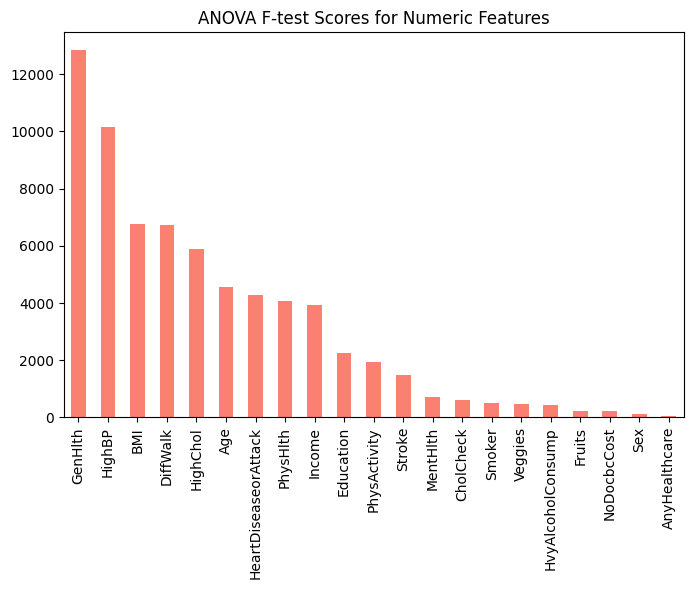


ANOVA F-test Scores for Numeric Features:
GenHlth                 12832.660123
HighBP                  10149.140418
BMI                      6768.361067
DiffWalk                 6727.221134
HighChol                 5890.843228
Age                      4560.441068
HeartDiseaseorAttack     4260.879233
PhysHlth                 4078.699854
Income                   3913.752954
Education                2245.725730
PhysActivity             1923.358158
Stroke                   1475.321639
MentHlth                  717.117372
CholCheck                 589.595733
Smoker                    507.270568
Veggies                   448.495944
HvyAlcoholConsump         426.586896
Fruits                    227.578441
NoDocbcCost               198.348259
Sex                       125.547952
AnyHealthcare              34.547987
dtype: float64


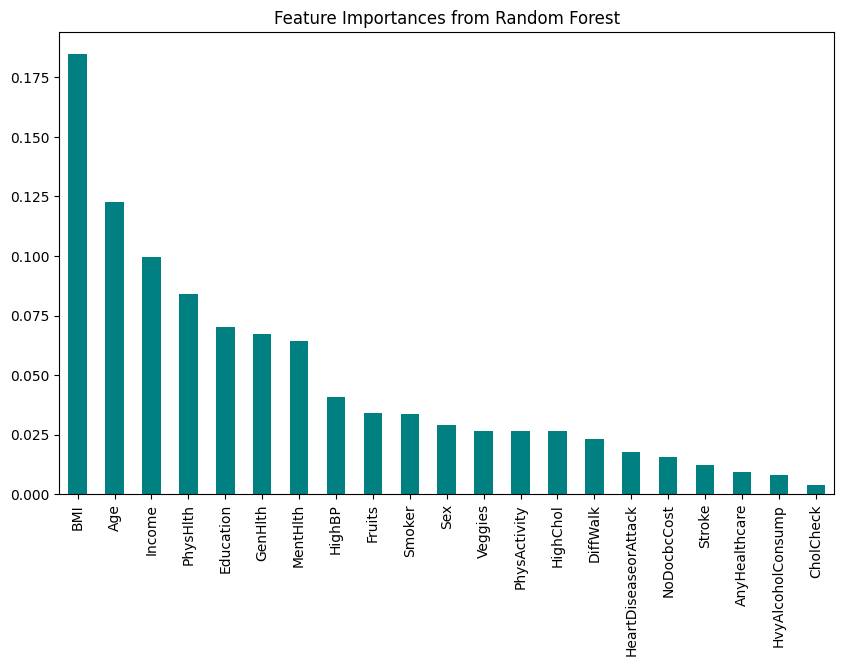


Feature Importances from Random Forest:
BMI                     0.184720
Age                     0.122828
Income                  0.099751
PhysHlth                0.084019
Education               0.070048
GenHlth                 0.067250
MentHlth                0.064505
HighBP                  0.040921
Fruits                  0.033977
Smoker                  0.033804
Sex                     0.028873
Veggies                 0.026640
PhysActivity            0.026342
HighChol                0.026326
DiffWalk                0.023335
HeartDiseaseorAttack    0.017604
NoDocbcCost             0.015500
Stroke                  0.012394
AnyHealthcare           0.009098
HvyAlcoholConsump       0.008166
CholCheck               0.003897
dtype: float64

--- Summary of Most Relevant Variables for Disease Prediction ---
Top Features (Chi-Square): N/A
Top Features (ANOVA F-test): ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']
Top Features (Random Forest): ['BMI', 'Age', 'Income', 'PhysHlth', 'Edu

In [16]:
# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display column names
print("Column Names in Dataset:")
print(df.columns)

# Define target variable
target = 'Diabetes_012'

# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_features.remove(target)

print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

# Handle missing values (drop rows with NaN for simplicity)
df = df.dropna()

# Encode categorical variables if any
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Define X (features) and y (target)
X = df[numeric_features + categorical_features]
y = df[target]

# Scale numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# 1. Chi-Square Test (for categorical features)
if categorical_features:
    chi_selector = SelectKBest(score_func=chi2, k='all')
    chi_scores = chi_selector.fit(X[categorical_features], y)
    chi_results = pd.Series(chi_scores.scores_, index=categorical_features).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    chi_results.plot(kind='bar', color='skyblue')
    plt.title('Chi-Square Scores for Categorical Features')
    plt.show()

    print("\nChi-Square Scores for Categorical Features:")
    print(chi_results)

# 2. ANOVA F-test (for numeric features)
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_scores = anova_selector.fit(X[numeric_features], y)
anova_results = pd.Series(anova_scores.scores_, index=numeric_features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
anova_results.plot(kind='bar', color='salmon')
plt.title('ANOVA F-test Scores for Numeric Features')
plt.show()

print("\nANOVA F-test Scores for Numeric Features:")
print(anova_results)

# 3. Feature Importances from RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar', color='teal')
plt.title('Feature Importances from Random Forest')
plt.show()

print("\nFeature Importances from Random Forest:")
print(rf_importances)

# Final summary
print("\n--- Summary of Most Relevant Variables for Disease Prediction ---")

# Top 5 features from each method
print("Top Features (Chi-Square):", chi_results.head(5).index.tolist() if categorical_features else "N/A")
print("Top Features (ANOVA F-test):", anova_results.head(5).index.tolist())
print("Top Features (Random Forest):", rf_importances.head(5).index.tolist())

## Theme 1: Question . 4 (b.) Generate a Machine Learning Model for disease Prediction 

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth            

c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

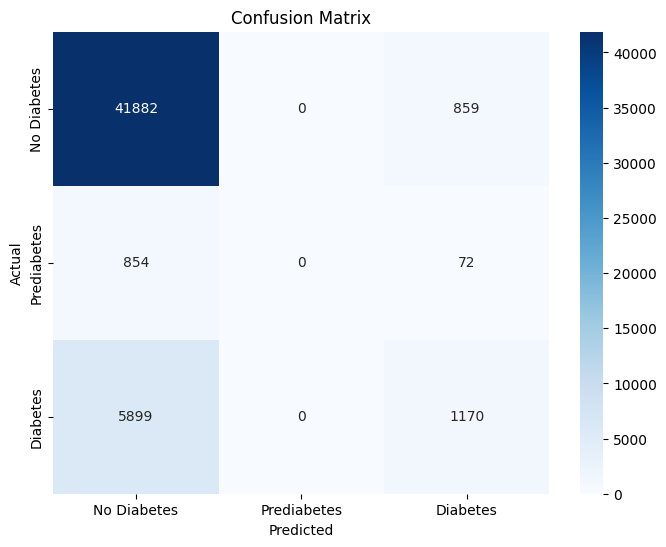

ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.

In [18]:
# Load dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(df.info())

# Define target variable
target = 'Diabetes_012'

# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_features.remove(target)

print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

# Handle missing values (drop rows with NaN for simplicity)
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df[numeric_features + categorical_features]
y = df[target]

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling for numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Initialize RandomForest model
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_split=5)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances')
plt.show()

# Cross-validation for model stability
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("\nBest Hyperparameters:", random_search.best_params_)

# Evaluate optimized model
y_pred_optimized = best_rf.predict(X_test)
print("\nOptimized Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


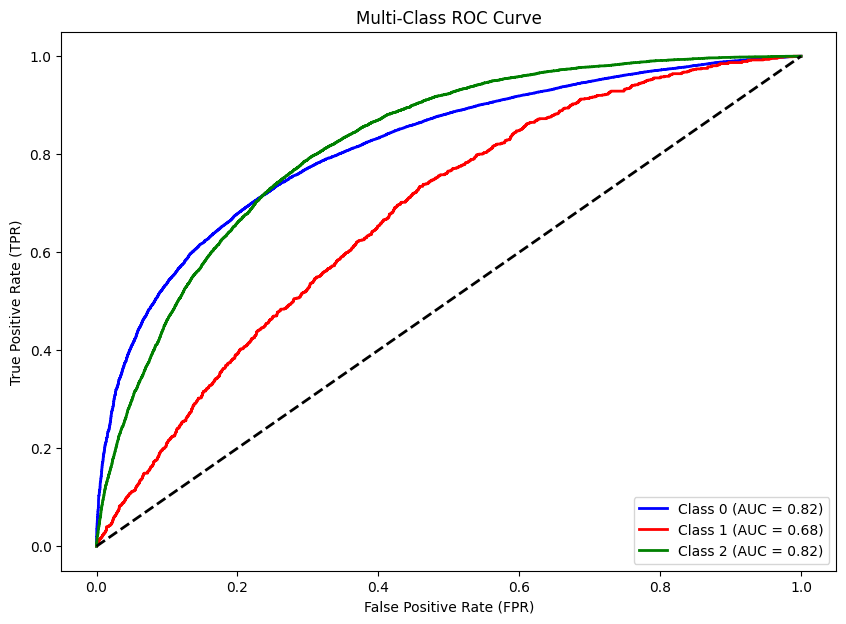

In [20]:
# Binarize the output labels for multi-class ROC curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = rf.predict_proba(X_test)

# Plot Multi-class ROC curve
plt.figure(figsize=(10, 7))

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random chance)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Multi-Class ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

## Theme 1: Question . 4 (c.) Validate the Performance of of the Above generated Model

In [21]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


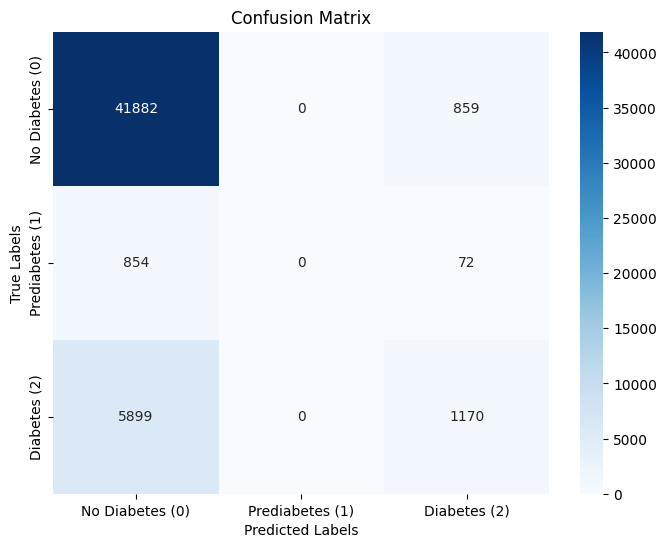


Classification Report:
                 precision    recall  f1-score   support

No Diabetes (0)       0.86      0.98      0.92     42741
Prediabetes (1)       0.00      0.00      0.00       926
   Diabetes (2)       0.56      0.17      0.26      7069

       accuracy                           0.85     50736
      macro avg       0.47      0.38      0.39     50736
   weighted avg       0.80      0.85      0.81     50736

Model Accuracy: 0.85


c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Cross-Validation Scores: [0.84888442 0.84797777 0.84839167 0.84896326 0.84839167]
Average CV Accuracy: 0.85


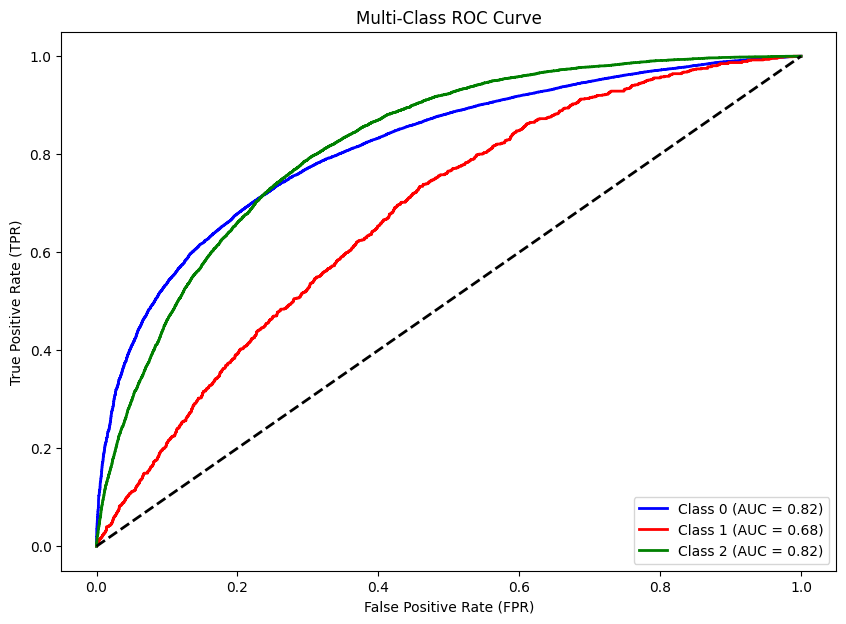

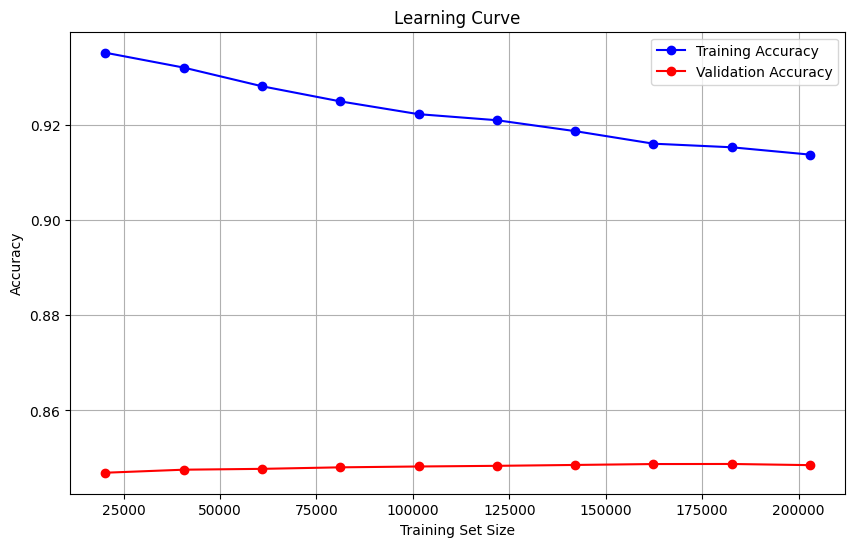

In [22]:
# Define classes for multi-class ROC
class_labels = ['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# 3. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# 4. Cross-Validation (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Average CV Accuracy: {np.mean(cv_scores):.2f}")

# 5. Multi-Class ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = rf.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 7))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random chance)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.title('Multi-Class ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

# 6. Learning Curve (for model performance over time)
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# THE END  ####